#Without using an optimiser

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train = np.array([[4.3], [5], [9.6], [8.65], [6], [4], [5.3], [9.2], [8.2], [6.999], [9.6]], dtype= np.float32)
y_train = np.array([[5.9], [7.49], [10.4], [6.889], [6.6], [5.6], [5.5], [8.69], [8.2], [7.36], [8]], dtype= np.float32)

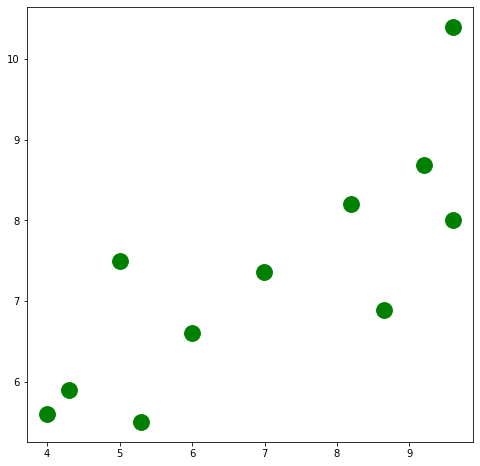

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.show()

In [0]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [0]:
inp = 1
hidden = 5
out = 1

In [0]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out)
)

In [0]:
loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [34]:
learning_rate = 1e-4
for i in range(1000):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)

  print(i, loss.item())

  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      param -= param.grad * learning_rate

0 159.23960876464844
1 107.5807876586914
2 73.05058288574219
3 50.993797302246094
4 37.50880813598633
5 29.580713272094727
6 25.070573806762695
7 22.571508407592773
8 21.214134216308594
9 20.487016677856445
10 20.100500106811523
11 19.89511489868164
12 19.784931182861328
13 19.724369049072266
14 19.689489364624023
15 19.6678524017334
16 19.653024673461914
17 19.641687393188477
18 19.63214111328125
19 19.62350082397461
20 19.6153564453125
21 19.607431411743164
22 19.59964942932129
23 19.591922760009766
24 19.58424949645996
25 19.57659149169922
26 19.568954467773438
27 19.561321258544922
28 19.553699493408203
29 19.54608154296875
30 19.538476943969727
31 19.5308837890625
32 19.523290634155273
33 19.515705108642578
34 19.50812339782715
35 19.50055503845215
36 19.492984771728516
37 19.48543357849121
38 19.477874755859375
39 19.470333099365234
40 19.462797164916992
41 19.455265045166016
42 19.447742462158203
43 19.44021987915039
44 19.43270492553711
45 19.425209045410156
46 19.4177093505859

In [35]:
predicted = model(x).detach().numpy()
predicted

array([[4.6597166],
       [5.298765 ],
       [9.498227 ],
       [8.630946 ],
       [6.2116914],
       [4.385839 ],
       [5.572643 ],
       [9.133056 ],
       [8.220129 ],
       [7.123705 ],
       [9.498227 ]], dtype=float32)

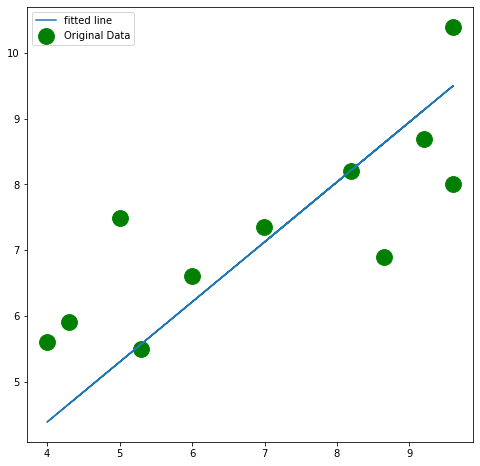

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.plot(x, predicted, label = 'fitted line')
plt.legend()
plt.show()

#Using an optimiser

In [0]:
x_train = np.array([[4.3], [5], [9.6], [8.65], [6], [4], [5.3], [9.2], [8.2], [6.999], [9.6]], dtype= np.float32)
y_train = np.array([[5.9], [7.49], [10.4], [6.889], [6.6], [5.6], [5.5], [8.69], [8.2], [7.36], [8]], dtype= np.float32)

In [0]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [0]:
inp = 1
hidden = 5
out = 1

In [0]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out)
)

In [0]:
loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [44]:
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
for i in range(1000):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)

  print(i, loss.item())

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

0 804.4832763671875
1 631.5892333984375
2 501.87127685546875
3 397.367431640625
4 310.27850341796875
5 237.48846435546875
6 177.66683959960938
7 130.056640625
8 93.67285919189453
9 67.1098861694336
10 48.56898880004883
11 36.16593933105469
12 28.180072784423828
13 23.20221519470215
14 20.18021583557129
15 18.387989044189453
16 17.341882705688477
17 16.737455368041992
18 16.389488220214844
19 16.188261032104492
20 16.070053100585938
21 15.998400688171387
22 15.952722549438477
23 15.92143726348877
24 15.898120880126953
25 15.879206657409668
26 15.862722396850586
27 15.847578048706055
28 15.833176612854004
29 15.819201469421387
30 15.805471420288086
31 15.791869163513184
32 15.77836799621582
33 15.764924049377441
34 15.751516342163086
35 15.738143920898438
36 15.724801063537598
37 15.71148681640625
38 15.698192596435547
39 15.684924125671387
40 15.671674728393555
41 15.658451080322266
42 15.645240783691406
43 15.632070541381836
44 15.618903160095215
45 15.605766296386719
46 15.59265136718

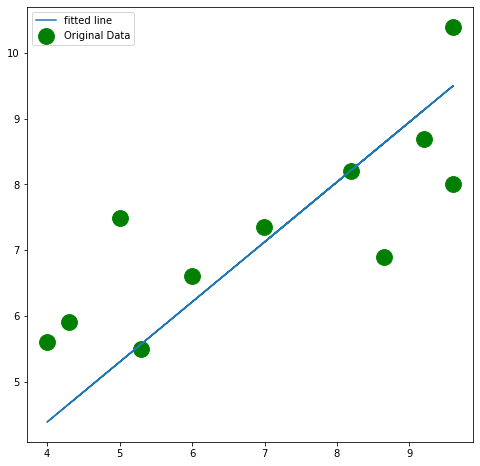

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original Data')
plt.plot(x, predicted, label = 'fitted line')
plt.legend()
plt.show()